## Data Analysis on POI

In [18]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
%matplotlib inline

In [3]:
poi = pd.read_csv("poi.csv")

In [4]:
poi.head()

,name,latitude_radian,longitude_radian,num_links,links,num_categories,categories
0,"YAYCHI, WEST AZERBAIJAN",0.683175,0.778053,13,Baba Jik Rural District; West Azerbaijan Provi...,1,POPULATED PLACES IN CHALDORAN COUNTY
1,MOUNT FISKE GLACIER,0.648196,-2.071114,9,Mount Fiske; Mount Warlow Glacier; U.S. state;...,3,GLACIERS OF THE SIERRA NEVADA (U.S.); GLACIERS...
2,ALATONA,0.258356,-0.103606,10,Diabaly; Alatona Irrigation Project; Mali; Nio...,2,POPULATED PLACES IN SÉGOU REGION; IRRIGATION P...
3,PEMBA ISLAND,-0.090175,0.694350,43,Malaysia Airlines Flight 370; Arusha; Chake Ch...,5,PEMBA ISLAND; ISLANDS OF TANZANIA; ISLANDS OF ...
4,MBOLO,0.149517,0.359829,6,UTC; Sub-prefectures of the Central African Re...,2,N'DÉLÉ; POPULATED PLACES IN BAMINGUI-BANGORAN


In [5]:
poi.name.describe()

count     424205
unique    424205
top       BEOČIĆ
freq           1
Name: name, dtype: object

In [6]:
poi.categories.value_counts()

CITIES AND TOWNS IN LOMBARDY                                                                                                                                                                                                                                                                              1116
CITIES AND TOWNS IN PIEDMONT                                                                                                                                                                                                                                                                              1003
POPULATED PLACES IN KERMANSHAH COUNTY                                                                                                                                                                                                                                                                      691
VILLAGES IN SAXONY-ANHALT                                                                  

In [7]:
category_reviewed = poi.groupby('categories').categories.agg([len])

In [8]:
category_reviewed

,len
categories,
ASSYRIAN COMMUNITIES IN IRAQ; POPULATED PLACES IN DOHUK PROVINCE,1
CITIES AND TOWNS IN SIVAGANGA DISTRICT; VILLAGES IN SIVAGANGA DISTRICT,1
"EDUCATION IN PUNJAB, PAKISTAN; POPULATED PLACES IN SHEIKHUPURA DISTRICT",1
"HOSPITALS ESTABLISHED IN 1885; HOSPITALS IN COLORADO; BUILDINGS AND STRUCTURES IN CHAFFEE COUNTY, COLORADO",1
ORANGE FREE STATE; MOUNTAIN RANGES OF LESOTHO; DRAKENSBERG,1
...,...
ŽEPČE; POPULATED PLACES IN ŽEPČE,1
ŽIROVNICA; POPULATED PLACES IN THE MUNICIPALITY OF ŽIROVNICA,1
ǁKARAS REGION; GHOST TOWNS IN AFRICA; FORMER POPULATED PLACES IN NAMIBIA; GERMAN SOUTH WEST AFRICA,1


In [9]:
category_reviewed.sort_values(by='len', ascending=False)

,len
categories,
CITIES AND TOWNS IN LOMBARDY,1116
CITIES AND TOWNS IN PIEDMONT,1003
POPULATED PLACES IN KERMANSHAH COUNTY,691
VILLAGES IN SAXONY-ANHALT,611
POPULATED PLACES IN URMIA COUNTY,591
...,...
"GHOST TOWNS IN SOUTH TEXAS; CENSUS-DESIGNATED PLACES IN TEXAS; CENSUS-DESIGNATED PLACES IN BEE COUNTY, TEXAS",1
"GHOST TOWNS IN SOUTH TEXAS; POPULATED PLACES IN AUSTIN COUNTY, TEXAS; UNINCORPORATED COMMUNITIES IN TEXAS",1
"GHOST TOWNS IN SOUTH TEXAS; POPULATED PLACES IN FORT BEND COUNTY, TEXAS",1


In [10]:
category_new = category_reviewed[category_reviewed.len >=488]

In [11]:
category_new

,len
categories,
CITIES AND TOWNS IN LOMBARDY,1116
CITIES AND TOWNS IN PIEDMONT,1003
CITIES AND TOWNS IN VENETO,514
MUNICIPALITIES IN SÃO PAULO (STATE),488
POPULATED PLACES IN KERMANSHAH COUNTY,691
POPULATED PLACES IN KHORRAMABAD COUNTY,511
POPULATED PLACES IN URMIA COUNTY,591
RURAL LOCALITIES IN THE SAKHA REPUBLIC,563
VILLAGES IN KAPURTHALA DISTRICT,555


Text(0, 0.5, 'Frequency')

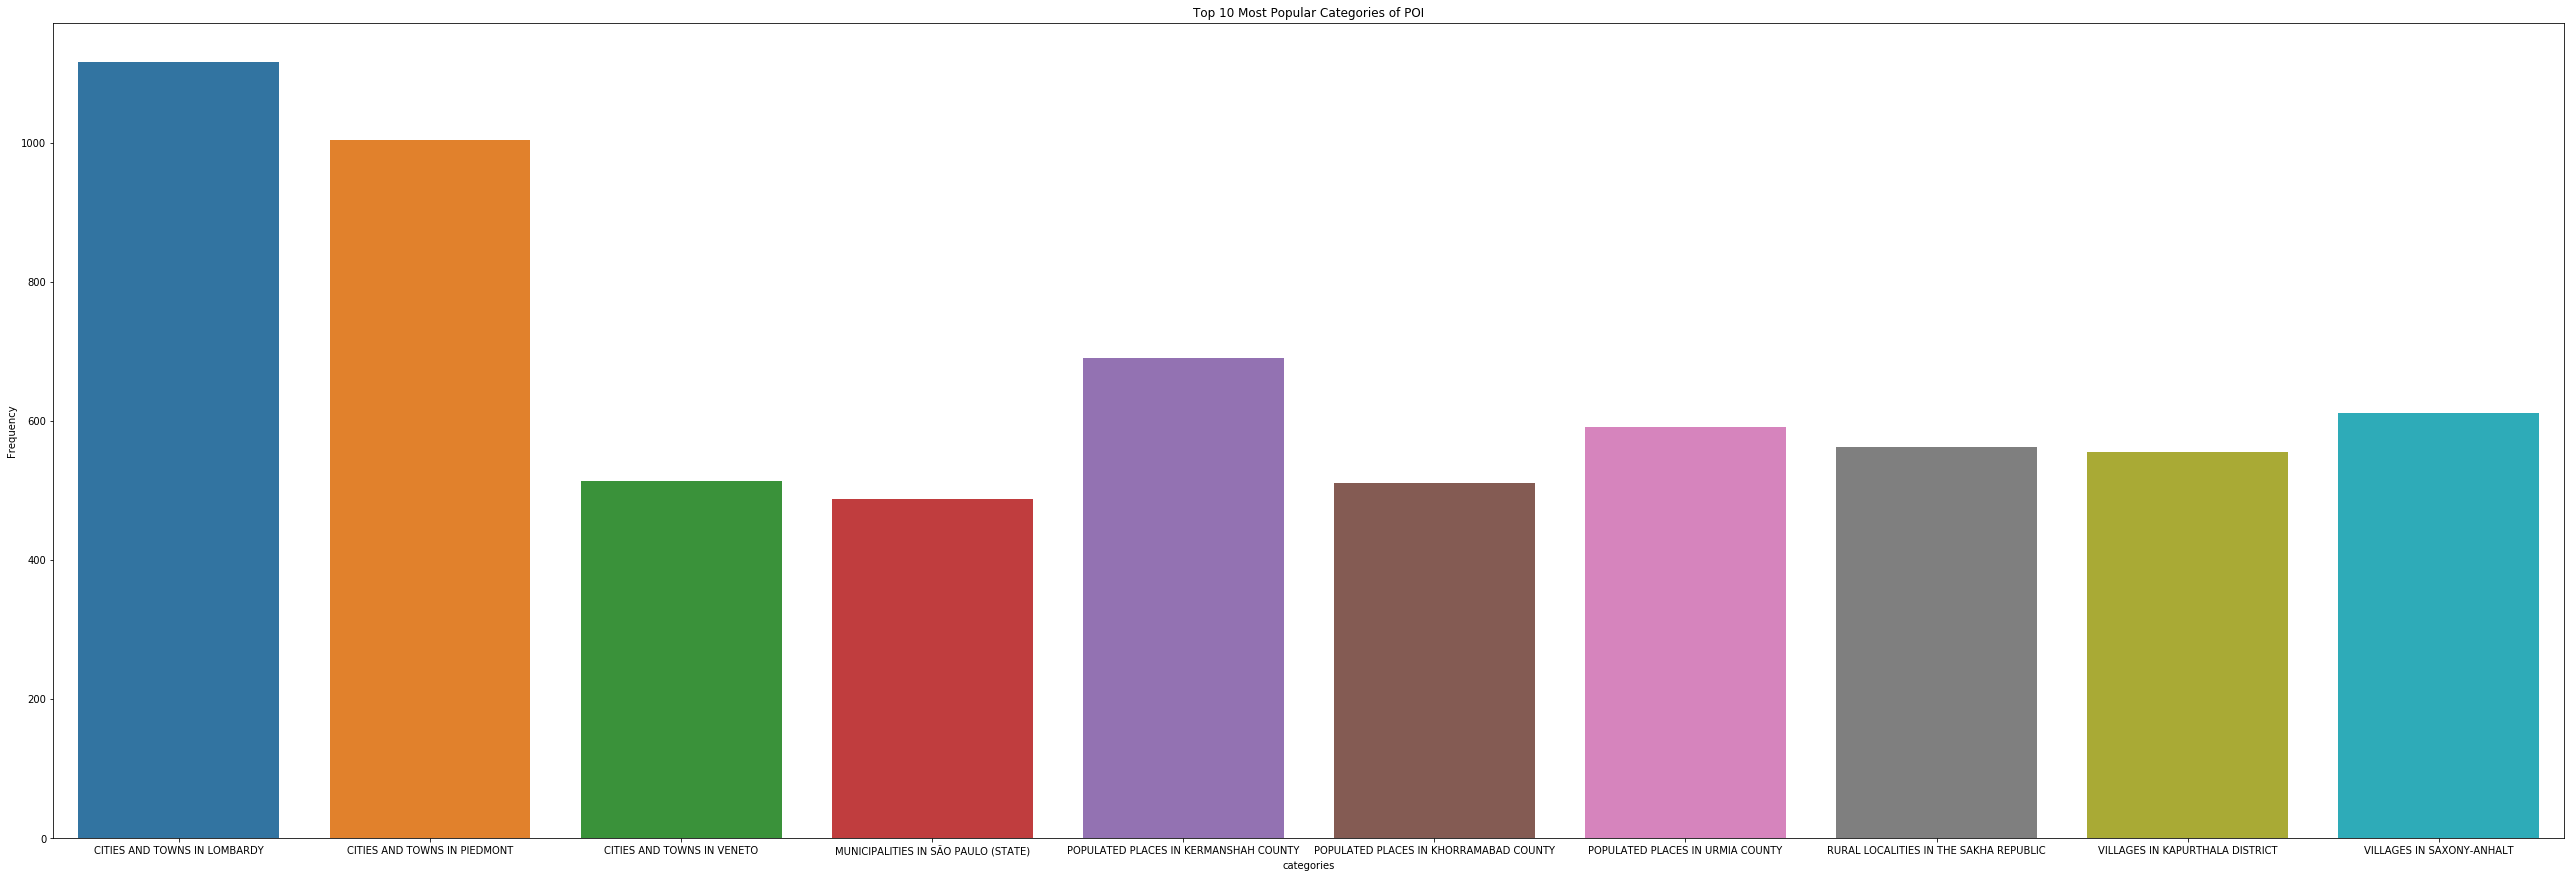

In [16]:
plt.figure(figsize=(45,15))
plt.title('Top 10 Most Popular Categories of POI')
sns.barplot(x=category_new.index, y=category_new['len'])
plt.ylabel('Frequency')

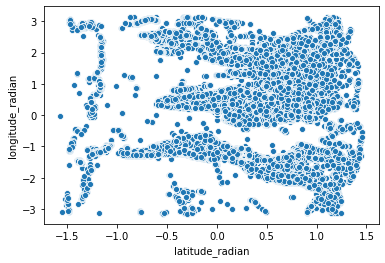

In [19]:
sns.scatterplot (x=poi['latitude_radian'],y=poi['longitude_radian'])